In [1]:
# Standard module imports
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# Setup figures and upload plotting modules
style='notebook'
execfile('/Users/ttshimiz/Dropbox/Research/figure_setup.py')

In [59]:
# Upload the sample data
bass_dir = '/Users/ttshimiz/Dropbox/Research/BASS/'
bass_general = pd.read_csv(bass_dir+'bass_general_dr1.csv', index_col=0, skiprows=[1])       # File with general info for every source
bass_sy_class = pd.read_csv(bass_dir+'bass_seyfert_class_v2.csv', index_col=0)     # File with the Winkler 1992 seyfert class types
df = pd.read_csv('../data/cleaned_sample.csv', index_col=0)

In [78]:
df['Lnarrow/Lbroad'] = df['Narrow Halpha Luminosity']/df['Broad Halpha Luminosity']
df['Lbroad/Lnarrow'] = df['Broad Halpha Luminosity']/df['Narrow Halpha Luminosity']
df['LX/Lbroad'] = df['Intrinsic X-ray Luminosity']/df['Broad Halpha Luminosity']
df['LX/Lnarrow'] = df['Intrinsic X-ray Luminosity']/df['Narrow Halpha Luminosity']

type1 = (df['Type'] == 1) | (df['Type'] == 1.2)
type1_5 = (df['Type'] == 1.5)
type1_9 = (df['Type'] == 1.9)
xray_absorbed = ((df['NH'] >= 22.0)) & ((df['Type'] == 1) | (df['Type'] == 1.2) | (df['Type'] == 1.5) | (df['Type'] == 1.9))

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


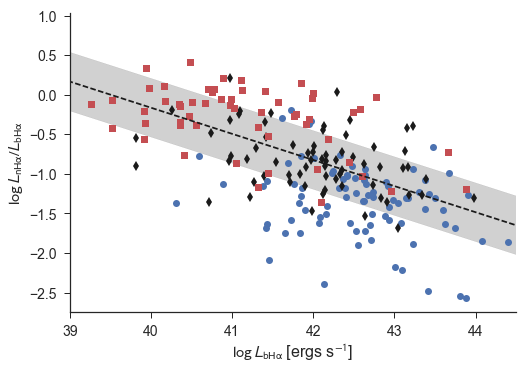

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.log10(df['Broad Halpha Luminosity'][type1]), np.log10(df['Lnarrow/Lbroad'][type1]), 'bo')
ax.plot(np.log10(df['Broad Halpha Luminosity'][type1_5]), np.log10(df['Lnarrow/Lbroad'][type1_5]), 'kd')
ax.plot(np.log10(df['Broad Halpha Luminosity'][type1_9]), np.log10(df['Lnarrow/Lbroad'][type1_9]), 'rs')


# Plot the Stern+12 line
lbha_mod = (10**np.arange(38, 45, 0.01))
lnha_mod = 0.15*(lbha_mod/10**42)**(0.67)*10**42
lnha_lbha_ratio_mod = lnha_mod/lbha_mod

ax.plot(np.log10(np.array(lbha_mod, dtype=np.float64)), np.log10(np.array(lnha_lbha_ratio_mod, dtype=np.float64)), 'k--')
ax.fill_between(np.log10(np.array(lbha_mod, dtype=np.float64)), np.log10(np.array(lnha_lbha_ratio_mod, dtype=np.float64))-0.37,
                np.log10(np.array(lnha_lbha_ratio_mod, dtype=np.float64))+0.37, color='k', alpha=0.2)
ax.set_xlim(39, 44.5)
ax.set_xlabel(r'$\log\,L_{\rm bH\alpha}$ [ergs s$^{-1}$]')
ax.set_ylabel(r'$\log\,L_{\rm nH\alpha}/L_{\rm bH\alpha}$')
sn.despine()

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


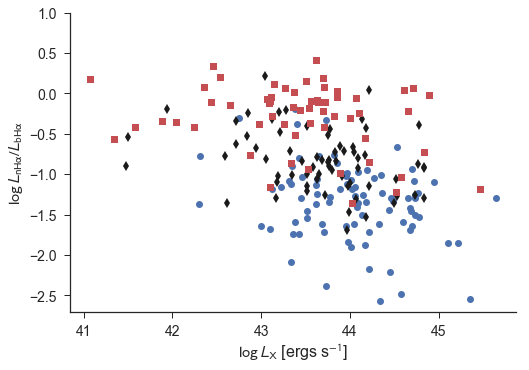

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.log10(df['Intrinsic X-ray Luminosity'][type1]), np.log10(df['Lnarrow/Lbroad'][type1]), 'bo')
ax.plot(np.log10(df['Intrinsic X-ray Luminosity'][type1_5]), np.log10(df['Lnarrow/Lbroad'][type1_5]), 'kd')
ax.plot(np.log10(df['Intrinsic X-ray Luminosity'][type1_9]), np.log10(df['Lnarrow/Lbroad'][type1_9]), 'rs')

ax.set_ylim(-2.7, 1.0)
ax.set_xlabel(r'$\log\,L_{\rm X}$ [ergs s$^{-1}$]')
ax.set_ylabel(r'$\log\,L_{\rm nH\alpha}/L_{\rm bH\alpha}$')
sn.despine()

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


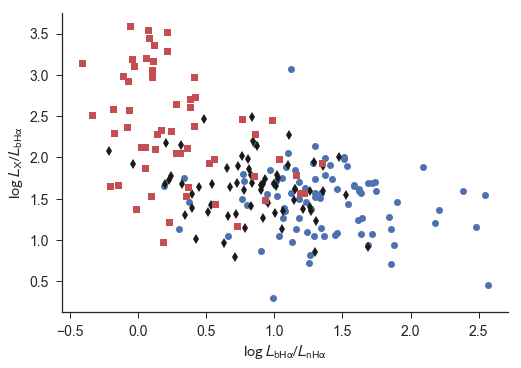

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.log10(df['Lbroad/Lnarrow'][type1]), np.log10(df['LX/Lbroad'][type1]), 'bo')
ax.plot( np.log10(df['Lbroad/Lnarrow'][type1_5]), np.log10(df['LX/Lbroad'][type1_5]), 'kd')
ax.plot( np.log10(df['Lbroad/Lnarrow'][type1_9]), np.log10(df['LX/Lbroad'][type1_9]), 'rs')

#ax.set_ylim(-2.7, 1.0)
ax.set_ylabel(r'$\log\,L_{\rm X}/L_{\rm bH\alpha}$')
ax.set_xlabel(r'$\log\,L_{\rm bH\alpha}/L_{\rm nH\alpha}$')
sn.despine()

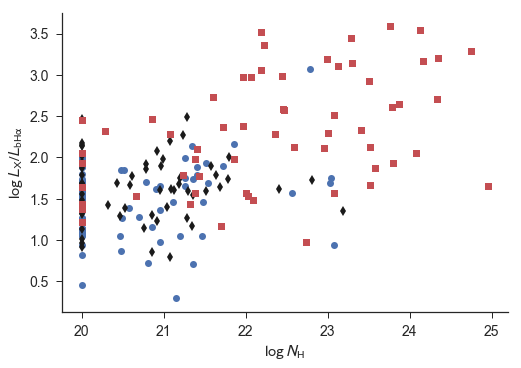

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['NH'][type1], np.log10(df['LX/Lbroad'][type1]), 'bo')
ax.plot( df['NH'][type1_5], np.log10(df['LX/Lbroad'][type1_5]), 'kd')
ax.plot( df['NH'][type1_9], np.log10(df['LX/Lbroad'][type1_9]), 'rs')

#ax.set_ylim(-2.7, 1.0)
ax.set_xlabel(r'$\log\,N_{\rm H}$')
ax.set_ylabel(r'$\log\,L_{\rm X}/L_{\rm bH\alpha}$')
sn.despine()

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


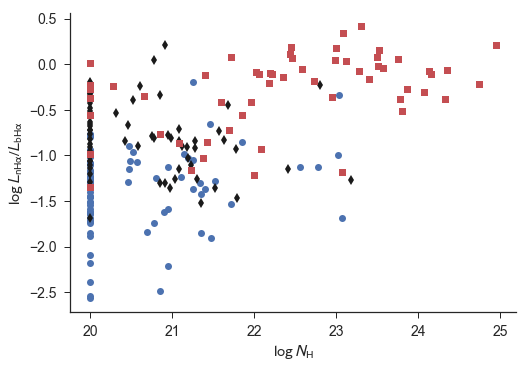

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['NH'][type1], np.log10(df['Lnarrow/Lbroad'][type1]), 'bo')
ax.plot( df['NH'][type1_5], np.log10(df['Lnarrow/Lbroad'][type1_5]), 'kd')
ax.plot( df['NH'][type1_9], np.log10(df['Lnarrow/Lbroad'][type1_9]), 'rs')

#ax.set_ylim(-2.7, 1.0)
ax.set_xlabel(r'$\log\,N_{\rm H}$')
ax.set_ylabel(r'$\log\,L_{\rm nH\alpha}/L_{\rm bH\alpha}$')
sn.despine()

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


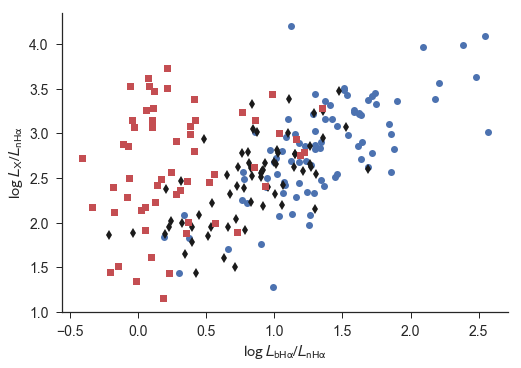

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.log10(df['Lbroad/Lnarrow'][type1]), np.log10(df['LX/Lnarrow'][type1]), 'bo')
ax.plot( np.log10(df['Lbroad/Lnarrow'][type1_5]), np.log10(df['LX/Lnarrow'][type1_5]), 'kd')
ax.plot( np.log10(df['Lbroad/Lnarrow'][type1_9]), np.log10(df['LX/Lnarrow'][type1_9]), 'rs')

#ax.set_ylim(-2.7, 1.0)
ax.set_ylabel(r'$\log\,L_{\rm X}/L_{\rm nH\alpha}$')
ax.set_xlabel(r'$\log\,L_{\rm bH\alpha}/L_{\rm nH\alpha}$')
sn.despine()

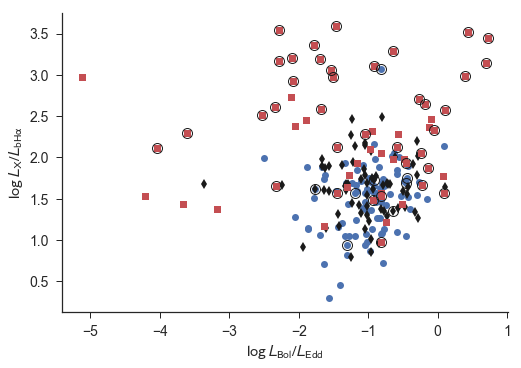

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['logEddRatio'][type1], np.log10(df['LX/Lbroad'][type1]), 'bo')
ax.plot(df['logEddRatio'][type1_5], np.log10(df['LX/Lbroad'][type1_5]), 'kd')
ax.plot(df['logEddRatio'][type1_9], np.log10(df['LX/Lbroad'][type1_9]), 'rs')
ax.plot(df['logEddRatio'][xray_absorbed], np.log10(df['LX/Lbroad'][xray_absorbed]), marker='o', ms=10, mfc='None',
        mec='k', ls='None', color='k', mew=1.0)

#ax.set_ylim(-2.7, 1.0)
ax.set_xlabel(r'$\log\,L_{\rm Bol}/L_{\rm Edd}$')
ax.set_ylabel(r'$\log\,L_{\rm X}/L_{\rm bH\alpha}$')
sn.despine()

In [89]:
df[(np.log10(df['LX/Lbroad']) > 2.5) & (df['logEddRatio'] > -0.6)]

,Broad Halpha Flux,Distance,Intrinsic 14-150 Flux,NH,Narrow Halpha Flux,Type,logMBH,logEddRatio,Intrinsic X-ray Luminosity,Broad Halpha Luminosity,Narrow Halpha Luminosity,Lnarrow/Lbroad,Lbroad/Lnarrow,LX/Lbroad,LX/Lnarrow
58,133.190676,47.480,67.0,24.33,55.692628,1.9,5.81,-0.27,1.807582e+43,3.593329e+40,1.502522e+40,0.418142,2.391532,503.038215,1203.031757
79,8.448860,172.560,11.7,23.30,21.898811,1.9,5.81,0.70,4.169345e+43,3.010787e+40,7.803735e+40,2.591925,0.385814,1384.802277,534.275576
131,46.895387,72.940,20.7,23.87,24.896047,1.9,6.06,-0.18,1.317964e+43,2.985818e+40,1.585125e+40,0.530885,1.883648,441.408023,831.457311
150,47.597511,93.940,17.7,22.46,55.501764,1.9,6.01,0.11,1.869287e+43,5.026747e+40,5.861511e+40,1.166064,0.857586,371.868187,318.908784
472,52.263603,36.160,174.0,22.18,32.140592,1.9,5.86,0.43,2.722750e+43,8.178203e+39,5.029356e+39,0.614971,1.626093,3329.276762,5413.714871
712,211.588556,23.833,205.4,22.44,273.583037,1.9,5.62,0.39,1.396238e+43,1.438306e+40,1.859723e+40,1.292995,0.773398,970.751937,750.777542
988,37.660594,57.730,105.9,23.28,31.411427,1.9,5.72,0.72,4.223775e+43,1.502076e+40,1.252831e+40,0.834066,1.198946,2811.957779,3371.384518
1200,34.287623,213.860,12.1,20.41,-2.668023,2.0,6.88,-0.16,6.622870e+43,1.876715e+41,-1.460328e+40,-0.077813,-12.851324,352.897020,-4535.194025


/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


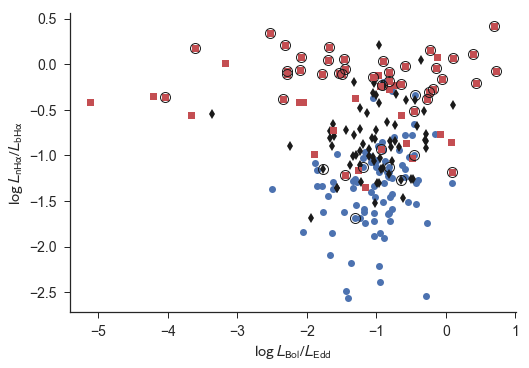

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['logEddRatio'][type1], np.log10(df['Lnarrow/Lbroad'][type1]), 'bo')
ax.plot(df['logEddRatio'][type1_5], np.log10(df['Lnarrow/Lbroad'][type1_5]), 'kd')
ax.plot(df['logEddRatio'][type1_9], np.log10(df['Lnarrow/Lbroad'][type1_9]), 'rs')
ax.plot(df['logEddRatio'][xray_absorbed], np.log10(df['Lnarrow/Lbroad'][xray_absorbed]), marker='o', ms=10, mfc='None',
        mec='k', ls='None', color='k', mew=1.0)

ax.set_xlabel(r'$\log\,L_{\rm Bol}/L_{\rm Edd}$')
ax.set_ylabel(r'$\log\,L_{\rm nH\alpha}/L_{\rm bH\alpha}$')
sn.despine()

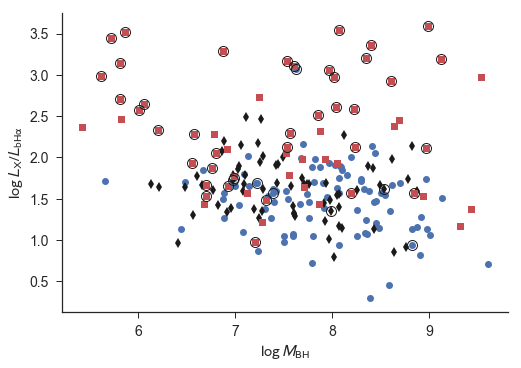

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['logMBH'][type1], np.log10(df['LX/Lbroad'][type1]), 'bo')
ax.plot(df['logMBH'][type1_5], np.log10(df['LX/Lbroad'][type1_5]), 'kd')
ax.plot(df['logMBH'][type1_9], np.log10(df['LX/Lbroad'][type1_9]), 'rs')
ax.plot(df['logMBH'][xray_absorbed], np.log10(df['LX/Lbroad'][xray_absorbed]), marker='o', ms=10, mfc='None',
        mec='k', ls='None', color='k', mew=1.0)
#ax.set_ylim(-2.7, 1.0)
ax.set_xlabel(r'$\log\,M_{\rm BH}$')
ax.set_ylabel(r'$\log\,L_{\rm X}/L_{\rm bH\alpha}$')
sn.despine()

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


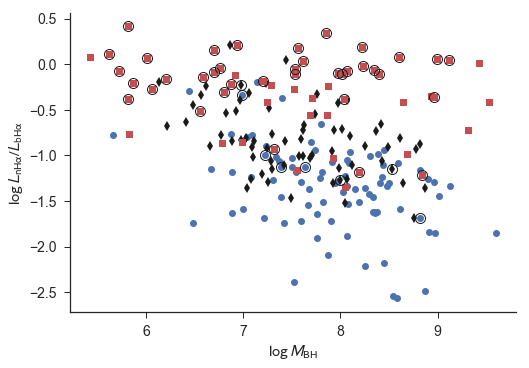

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['logMBH'][type1], np.log10(df['Lnarrow/Lbroad'][type1]), 'bo')
ax.plot(df['logMBH'][type1_5], np.log10(df['Lnarrow/Lbroad'][type1_5]), 'kd')
ax.plot(df['logMBH'][type1_9], np.log10(df['Lnarrow/Lbroad'][type1_9]), 'rs')
ax.plot(df['logMBH'][xray_absorbed], np.log10(df['Lnarrow/Lbroad'][xray_absorbed]), marker='o', ms=10, mfc='None',
        mec='k', ls='None', color='k', mew=1.0)
#ax.set_ylim(-2.7, 1.0)
ax.set_xlabel(r'$\log\,M_{\rm BH}$')
ax.set_ylabel(r'$\log\,L_{\rm nH\alpha}/L_{\rm bH\alpha}$')
sn.despine()